## How to display the tumor segmentations and extract the 3D Bounding Boxes

In [25]:
# Load methods from src.visualization.py and necessary libraries
import sys
sys.path.append('..')  # Add the parent directory to the path
from src.visualization import *
from src.preprocessing import read_mri_phase_from_patient_id, read_segmentation_from_patient_id

In [26]:
# Define the dataset paths and folders (adjust path if necessary)
dataset_path = '/datasets/mama_mia_dataset'
images_folder = dataset_path + '/images'
expert_segmentations = dataset_path + '/segmentations/expert'

# Select a random patient to visualize the segmentation
patient_id = 'DUKE_001' #'ISPY1_1001' # Try with different patient IDs

In [27]:
# Load the first post-contrast MRI image (phase=1)
phase_1_sitk = read_mri_phase_from_patient_id(images_folder, patient_id, phase=1)
# Load the expert segmentation
expert_segmentation_sitk = read_segmentation_from_patient_id(expert_segmentations, patient_id)

# Get the 3D bounding box from the expert segmentation
[x_min, y_min, z_min, x_max, y_max, z_max] = get_segmentation_bounding_box(expert_segmentation_sitk, margin=0)
print('Bounding box from expert segmentation:')
print('X: [{}, {}]'.format(x_min, x_max))
print('Y: [{}, {}]'.format(y_min, y_max))
print('Z: [{}, {}]'.format(z_min, z_max))

Bounding box from expert segmentation:
X: [307, 338]
Y: [181, 214]
Z: [50, 69]


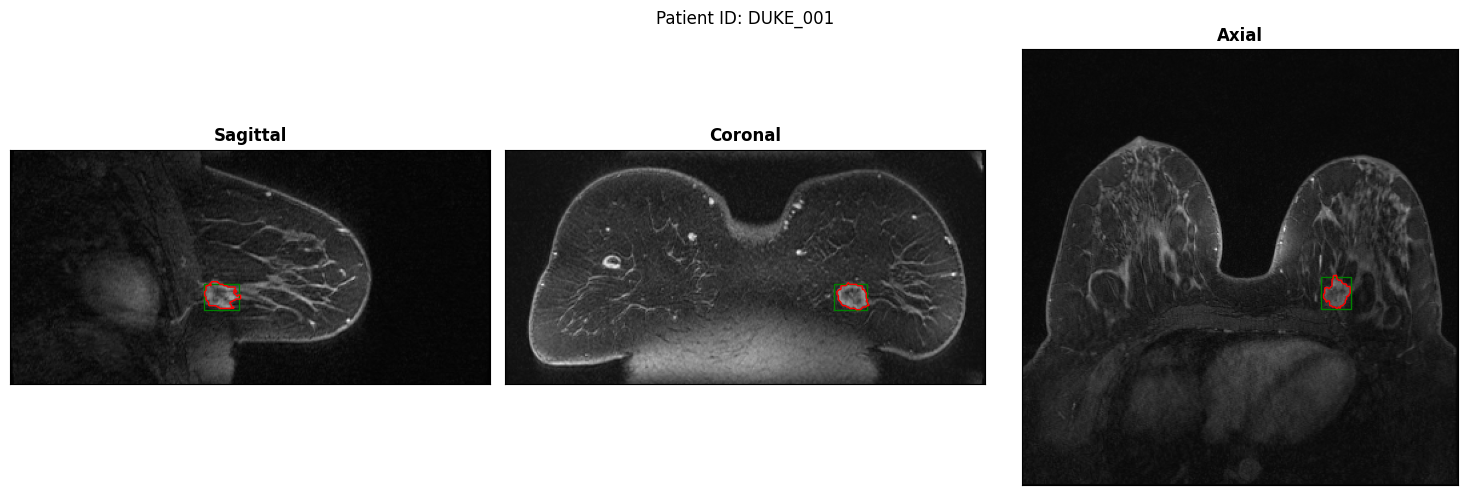

In [28]:
# Define the middle bounding box slices to display the 2D views
display_slices = [int((x_min+x_max)/2), int((y_min+y_max)/2), int((z_min+z_max)/2)]
    
# Visualize the image and segmentation
plot_mri_and_segmentation(phase_1_sitk, expert_segmentation_sitk, patient_id, display_slices=display_slices,
                        bounding_box=[x_min, y_min, z_min, x_max, y_max, z_max],
                        color='red', line_thickness=1)

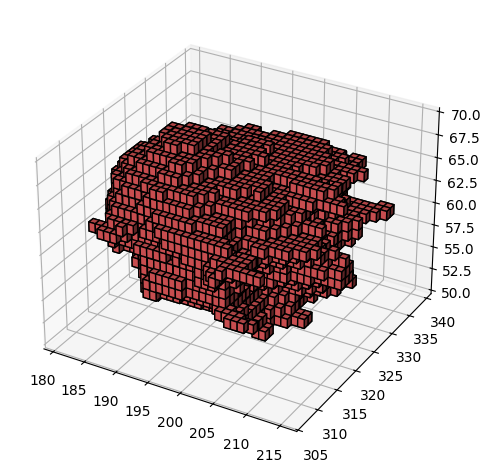

In [29]:
# Plot the segmentation in 3D (time consuming, skip if not necessary)
plot_3d_segmentation(expert_segmentation_sitk)

In [30]:
# Enable widgets in Jupyter Notebook to be able to interact with the plot
# jupyter nbextension enable --py widgetsnbextension

# Function to plot MRI and segmentation for axial, coronal, and sagittal views
interactive_plot_mri_and_segmentation(phase_1_sitk, expert_segmentation_sitk, patient_id, figsize=(8, 4))

interactive(children=(IntSlider(value=180, description='slicer_1', max=359), IntSlider(value=88, description='…